In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from collections import Counter

In [2]:
df = pd.read_csv('fully_processed_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,myear,calcage,leader,deputy,support,disabled,hired,sherpa,tibetan,msuccess,mclaimed,mdisputed,msolo,mtraverse,mski,mparapente,mspeed,mo2none,mo2climb,mo2descent,mo2sleep,mo2medical,death,hcn,host,totmembers,tothired,nohired,citizen_is_nation,hired_ratio,same_nat_as_leader,0,1,2,3,4,5,6,7,8,...,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483
0,1988,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,17,10,0,1,0.588235,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1988,40,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17,10,0,0,0.588235,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1988,29,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,17,10,0,0,0.588235,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1988,27,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17,10,0,0,0.588235,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1988,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,10,0,0,0.588235,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
y_summit = df.msuccess
y_death = df.death
X = df.drop(['msuccess', 'death'], axis=1)

##Summit

In [4]:
X_summit_train, X_summit_valid, y_summit_train, y_summit_valid = train_test_split(
    X, y_summit, train_size=0.8, test_size=0.2, random_state=0)

In [5]:
summit_model = XGBClassifier(
                             early_stopping_rounds=10,
                             lr = 0.05,
                             n_estimators=1000,
                             verbosity=1,
                             max_deapth=4
                             
                             )

summit_model.fit(X_summit_train, y_summit_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, lr=0.05, max_deapth=4,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [6]:
summit_predictions = summit_model.predict(X_summit_valid)

print(accuracy_score(y_summit_valid, summit_predictions))
print(log_loss(y_summit_valid, summit_predictions))

0.9066937119675457
3.2227427988323374


Accuracy: 0.9066937119675457
Null error rate: 0.9879032258064516
Error rate: 0.09330628803245436
True Positive Rate: 0.9581653225806451
False Positive Rate: 0.14540816326530612
True Negitive Rate: 0.8545918367346939
False Negitive Rate: 0.041834677419354836
Precision: 0.8696248856358646
F-measure: 0.9117505995203837


<Figure size 1080x432 with 0 Axes>

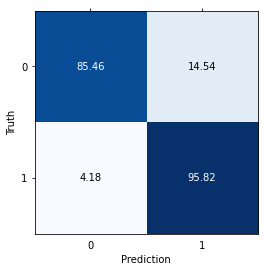

In [7]:
plt.figure(figsize=(15, 6))

summit_confusion = confusion_matrix(y_summit_valid, summit_predictions)

s_acc = (summit_confusion[0][0] + summit_confusion[1][1])/ (summit_confusion[0][0]
    + summit_confusion[0][1] + summit_confusion[1][0] + summit_confusion[1][1])
s_ner = (summit_confusion[0][0] + summit_confusion[0][1]) / (summit_confusion[1][0]
      + summit_confusion[1][1])
s_missclass = (summit_confusion[0][1] + summit_confusion[1][0]) / (
    summit_confusion[0][0] + summit_confusion[0][1] + summit_confusion[1][0] +
    summit_confusion[1][1])
s_tpr = summit_confusion[1][1] / (summit_confusion[1][0] + summit_confusion[1][1])
s_fpr = summit_confusion[0][1] / (summit_confusion[0][0] + summit_confusion[0][1])
s_tnr = summit_confusion[0][0] / (summit_confusion[0][0] + summit_confusion[0][1])
s_fnr = summit_confusion[1][0] / (summit_confusion[1][0] + summit_confusion[1][1])
s_prc = summit_confusion[1][1] / (summit_confusion[0][1] + summit_confusion[1][1])
s_f_measure = 2 * ((s_tpr * s_prc) / (s_tpr + s_prc))

print("Accuracy:", s_acc)
print("Null error rate:", s_ner)
print("Error rate:", s_missclass)
print("True Positive Rate:", s_tpr) # Sensitivity also recall
print("False Positive Rate:", s_fpr) 
print("True Negitive Rate:", s_tnr) # Specificty
print("False Negitive Rate:", s_fnr)
print("Precision:", s_prc)
print("F-measure:", s_f_measure)

temp_con = []
for i in summit_confusion:
  temp = i / sum(i) * 100
  temp_con.append(temp)

summit_confusion = temp_con

#summit_confusion = summit_confusion / len(y_summit_train)

plt.matshow(summit_confusion, cmap = 'Blues')
        
for (i, j), z in np.ndenumerate(summit_confusion):
    if(0 < z < 50):
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'black')
        
    else:
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'white')
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.tick_params(bottom = False, top = True, labelbottom = True, labeltop = False)
plt.grid(True, which = 'minor')
#plt.savefig("Graphs/.png", bbox_inches='tight', dpi=600)

##Death

In [8]:
X_death_train, X_death_valid, y_death_train, y_death_valid = train_test_split(
    X, y_death, train_size=0.8, test_size=0.2, random_state=0)

In [9]:
death_model = XGBClassifier(
                            early_stopping_rounds=10,
                            lr = 0.05,
                            n_estimators=1000,
                            verbosity=1,
                            max_deapth=4
                            )

death_model.fit(X_death_train, y_death_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, lr=0.05, max_deapth=4,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [10]:
death_predictions = death_model.predict(X_death_valid)

print(accuracy_score(y_death_valid, death_predictions))
print(log_loss(y_death_valid, death_predictions))

0.9903651115618661
0.33277887925609817


Accuracy: 0.9903651115618661
Null error rate: 0.010504739943633103
Error rate: 0.009634888438133874
True Positive Rate: 0.2682926829268293
False Positive Rate: 0.0020497053548552396
True Negitive Rate: 0.9979502946451447
False Negitive Rate: 0.7317073170731707
Precision: 0.5789473684210527
F-measure: 0.36666666666666664


<Figure size 1080x432 with 0 Axes>

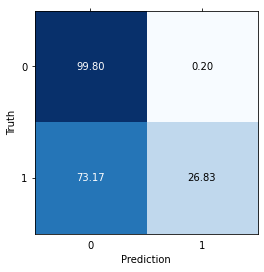

In [11]:
plt.figure(figsize=(15, 6))

death_confusion = confusion_matrix(y_death_valid, death_predictions)

d_acc = (death_confusion[0][0] + death_confusion[1][1])/ (death_confusion[0][0]
    + death_confusion[0][1] + death_confusion[1][0] + death_confusion[1][1])
d_ner = (death_confusion[1][0] + death_confusion[1][1]) / (death_confusion[0][0]
      + death_confusion[0][1])
d_missclass = (death_confusion[0][1] + death_confusion[1][0]) / (
    death_confusion[0][0] + death_confusion[0][1] + death_confusion[1][0] +
    death_confusion[1][1])
d_tpr = death_confusion[1][1] / (death_confusion[1][0] + death_confusion[1][1])
d_fpr = death_confusion[0][1] / (death_confusion[0][0] + death_confusion[0][1])
d_tnr = death_confusion[0][0] / (death_confusion[0][0] + death_confusion[0][1])
d_fnr = death_confusion[1][0] / (death_confusion[1][0] + death_confusion[1][1])
d_prc = death_confusion[1][1] / (death_confusion[0][1] + death_confusion[1][1])
d_f_measure = 2 * ((d_tpr * d_prc) / (d_tpr + d_prc))

print("Accuracy:", d_acc)
print("Null error rate:", d_ner)
print("Error rate:", d_missclass)
print("True Positive Rate:", d_tpr)
print("False Positive Rate:", d_fpr)
print("True Negitive Rate:", d_tnr)
print("False Negitive Rate:", d_fnr)
print("Precision:", d_prc)
print("F-measure:", d_f_measure)

temp_con = []
for i in death_confusion:
  temp = i / sum(i) * 100
  temp_con.append(temp)

death_confusion = temp_con

plt.matshow(death_confusion, cmap = 'Blues')
        
for (i, j), z in np.ndenumerate(death_confusion):
    if(0 < z < 50):
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'black')
        
    else:
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'white')
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.tick_params(bottom = False, top = True, labelbottom = True, labeltop = False)
plt.grid(True, which = 'minor')
#plt.savefig("Graphs/.png", bbox_inches='tight', dpi=600)

##Death with undersampling


In [12]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state = 0, replacement=True)

X_death_resampled_u, y_death_resampled_u = sampler.fit_resample(X_death_train,
                                                            y_death_train,
                                                            )
X_death_resampled_u = pd.DataFrame(X_death_resampled_u, columns=X_death_valid.columns)
y_death_resampled_u = pd.Series(y_death_resampled_u)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
death_model_u = XGBClassifier(
                            early_stopping_rounds=10,
                            lr = 0.05,
                            n_estimators=1000,
                            verbosity=1,
                            max_deapth=6,
                            )

death_model_u.fit(X_death_resampled_u, y_death_resampled_u)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, lr=0.05, max_deapth=6,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [14]:
death_predictions_u = death_model_u.predict(X_death_valid)

print(accuracy_score(y_death_valid, death_predictions_u))
print(log_loss(y_death_valid, death_predictions_u))

0.7238843813387424
9.536914366045872


Accuracy: 0.7238843813387424
Null error rate: 0.010504739943633103
Error rate: 0.2761156186612576
True Positive Rate: 0.7560975609756098
False Positive Rate: 0.27645400973610046
True Negitive Rate: 0.7235459902638995
False Negitive Rate: 0.24390243902439024
Precision: 0.027927927927927927
F-measure: 0.05386620330147698


<Figure size 1080x432 with 0 Axes>

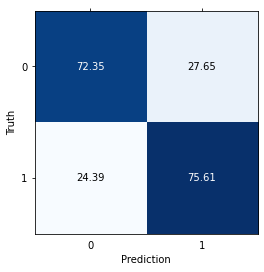

In [15]:
plt.figure(figsize=(15, 6))

death_confusion_u = confusion_matrix(y_death_valid, death_predictions_u)

d_acc_u = (death_confusion_u[0][0] + death_confusion_u[1][1])/ (death_confusion_u[0][0]
    + death_confusion_u[0][1] + death_confusion_u[1][0] + death_confusion_u[1][1])
d_ner_u = (death_confusion_u[1][0] + death_confusion_u[1][1]) / (death_confusion_u[0][0]
      + death_confusion_u[0][1])
d_missclass_u = (death_confusion_u[0][1] + death_confusion_u[1][0]) / (
    death_confusion_u[0][0] + death_confusion_u[0][1] + death_confusion_u[1][0] +
    death_confusion_u[1][1])
d_tpr_u = death_confusion_u[1][1] / (death_confusion_u[1][0] + death_confusion_u[1][1])
d_fpr_u = death_confusion_u[0][1] / (death_confusion_u[0][0] + death_confusion_u[0][1])
d_tnr_u = death_confusion_u[0][0] / (death_confusion_u[0][0] + death_confusion_u[0][1])
d_fnr_u = death_confusion_u[1][0] / (death_confusion_u[1][0] + death_confusion_u[1][1])
d_prc_u = death_confusion_u[1][1] / (death_confusion_u[0][1] + death_confusion_u[1][1])
d_f_measure_u = 2 * ((d_tpr_u * d_prc_u) / (d_tpr_u + d_prc_u))

print("Accuracy:", d_acc_u)
print("Null error rate:", d_ner_u)
print("Error rate:", d_missclass_u)
print("True Positive Rate:", d_tpr_u)
print("False Positive Rate:", d_fpr_u)
print("True Negitive Rate:", d_tnr_u)
print("False Negitive Rate:", d_fnr_u)
print("Precision:", d_prc_u)
print("F-measure:", d_f_measure_u)

temp_con = []
for i in death_confusion_u:
  temp = i / sum(i) * 100
  temp_con.append(temp)

death_confusion_u = temp_con

plt.matshow(death_confusion_u, cmap = 'Blues')
        
for (i, j), z in np.ndenumerate(death_confusion_u):
    if(0 < z < 50):
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'black')
        
    else:
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'white')
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.tick_params(bottom = False, top = True, labelbottom = True, labeltop = False)
plt.grid(True, which = 'minor')
#plt.savefig("Graphs/.png", bbox_inches='tight', dpi=600)

##Death with oversampling


In [16]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(random_state = 0)

X_death_resampled_o, y_death_resampled_o = sampler.fit_resample(X_death_train,
                                                                y_death_train,
                                                                )

X_death_resampled_o = pd.DataFrame(X_death_resampled_o,
                                   columns=X_death_valid.columns)
y_death_resampled_o = pd.Series(y_death_resampled_o)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
death_model_o = XGBClassifier(
                            early_stopping_rounds=10,
                            lr = 0.05,
                            n_estimators=1000,
                            verbosity=1,
                            max_deapth=6,
                            )

death_model_o.fit(X_death_resampled_o, y_death_resampled_o)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, lr=0.05, max_deapth=6,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [18]:
death_predictions_o = death_model_o.predict(X_death_valid)

print(accuracy_score(y_death_valid, death_predictions_o))
print(log_loss(y_death_valid, death_predictions_o))

0.9890973630831643
0.3765663741753944


Accuracy: 0.9890973630831643
Null error rate: 0.010504739943633103
Error rate: 0.0109026369168357
True Positive Rate: 0.2682926829268293
False Positive Rate: 0.003330771201639764
True Negitive Rate: 0.9966692287983603
False Negitive Rate: 0.7317073170731707
Precision: 0.4583333333333333
F-measure: 0.3384615384615385


<Figure size 1080x432 with 0 Axes>

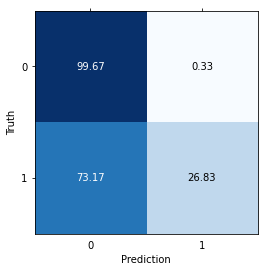

In [19]:
plt.figure(figsize=(15, 6))

death_confusion_o = confusion_matrix(y_death_valid, death_predictions_o)

d_acc_o = (death_confusion_o[0][0] + death_confusion_o[1][1])/ (death_confusion_o[0][0]
    + death_confusion_o[0][1] + death_confusion_o[1][0] + death_confusion_o[1][1])
d_ner_o = (death_confusion_o[1][0] + death_confusion_o[1][1]) / (death_confusion_o[0][0]
      + death_confusion_o[0][1])
d_missclass_o = (death_confusion_o[0][1] + death_confusion_o[1][0]) / (
    death_confusion_o[0][0] + death_confusion_o[0][1] + death_confusion_o[1][0] +
    death_confusion_o[1][1])
d_tpr_o = death_confusion_o[1][1] / (death_confusion_o[1][0] + death_confusion_o[1][1])
d_fpr_o = death_confusion_o[0][1] / (death_confusion_o[0][0] + death_confusion_o[0][1])
d_tnr_o = death_confusion_o[0][0] / (death_confusion_o[0][0] + death_confusion_o[0][1])
d_fnr_o = death_confusion_o[1][0] / (death_confusion_o[1][0] + death_confusion_o[1][1])
d_prc_o = death_confusion_o[1][1] / (death_confusion_o[0][1] + death_confusion_o[1][1])
d_f_measure_o = 2 * ((d_tpr_o * d_prc_o) / (d_tpr_o + d_prc_o))

print("Accuracy:", d_acc_o)
print("Null error rate:", d_ner_o)
print("Error rate:", d_missclass_o)
print("True Positive Rate:", d_tpr_o)
print("False Positive Rate:", d_fpr_o)
print("True Negitive Rate:", d_tnr_o)
print("False Negitive Rate:", d_fnr_o)
print("Precision:", d_prc_o)
print("F-measure:", d_f_measure_o)

temp_con = []
for i in death_confusion_o:
  temp = i / sum(i) * 100
  temp_con.append(temp)

death_confusion_o = temp_con

plt.matshow(death_confusion_o, cmap = 'Blues')
        
for (i, j), z in np.ndenumerate(death_confusion_o):
    if(0 < z < 50):
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'black')
        
    else:
        plt.text(j, i, '{0:0.2f}'.format(z), ha='center', va='center', color =
                 'white')
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.tick_params(bottom = False, top = True, labelbottom = True, labeltop = False)
plt.grid(True, which = 'minor')
#plt.savefig("Graphs/.png", bbox_inches='tight', dpi=600)